In [1]:
# Task 2 - Fraud Detection Model Training & Evaluation
# Dataset: Merged and processed Fraud_Data.csv

# --- [1] Imports ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, f1_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import numpy as np

# Load preprocessed feature sets and labels from Task 1
X_train_final = np.load("../Data/processed/X_train_final.npy")
X_test_final = np.load("../Data/processed/X_test_final.npy")
y_train_res = np.load("../Data/processed/y_train_res.npy")
y_test = np.load("../Data/processed/y_test.npy")


In [3]:
from sklearn.linear_model import LogisticRegression

# Train model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_final, y_train_res)


LogisticRegression(max_iter=1000, random_state=42)

In [4]:
import xgboost as xgb

# Train model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_final, y_train_res)


/home/feven-alemayehu/Documents/KAIM/week8and9/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [08:16:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

### Evaluation of both models


=== Logistic Regression Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.66      0.78     23376
           1       0.18      0.70      0.28      2454

    accuracy                           0.66     25830
   macro avg       0.57      0.68      0.53     25830
weighted avg       0.88      0.66      0.73     25830

F1 Score: 0.2833


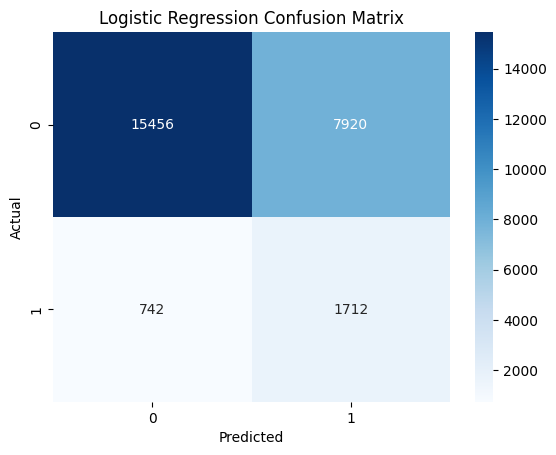

AUC-PR: 0.4408


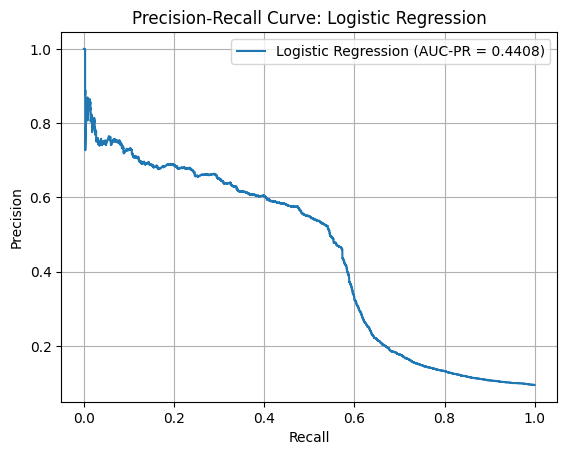


=== XGBoost Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     23376
           1       0.48      0.57      0.52      2454

    accuracy                           0.90     25830
   macro avg       0.71      0.75      0.73     25830
weighted avg       0.91      0.90      0.90     25830

F1 Score: 0.5200


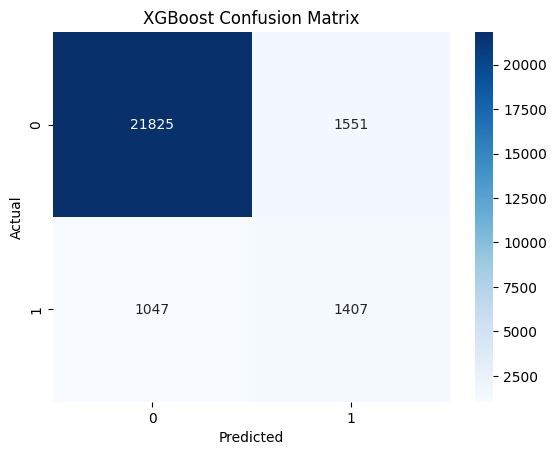

AUC-PR: 0.6147


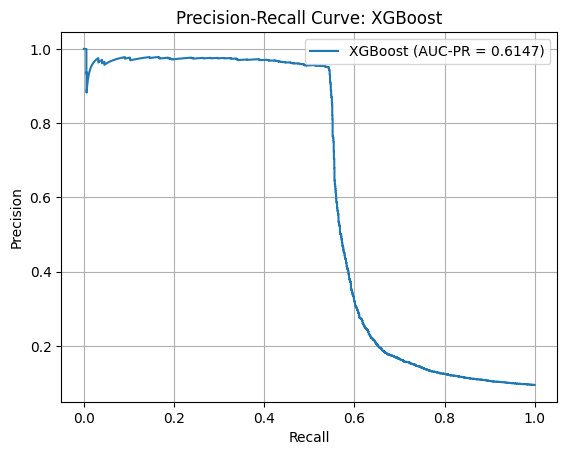

In [5]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, name):
    # Predict
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    print(f"\n=== {name} Classification Report ===")
    print(classification_report(y_test, y_pred))

    f1 = f1_score(y_test, y_pred)
    print(f"F1 Score: {f1:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # AUC-PR
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    auc_pr = auc(recall, precision)
    print(f"AUC-PR: {auc_pr:.4f}")

    # PR Curve
    plt.plot(recall, precision, label=f'{name} (AUC-PR = {auc_pr:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve: {name}')
    plt.legend()
    plt.grid()
    plt.show()

# Evaluate both models
evaluate_model(log_reg, X_test_final, y_test, "Logistic Regression")
evaluate_model(xgb_model, X_test_final, y_test, "XGBoost")


### ✅ XGBoost clearly outperforms Logistic Regression for this fraud detection task:

### It handles class imbalance much better.

### Gives a more practical balance between catching fraud and not flagging innocent users.

### F1 Score and precision are significantly better — crucial in fraud detection where false alarms are costly.